In [5]:
# Importing the Module
import random
import torch
import matplotlib.pyplot as plt


In [2]:
def synthetic_data(w, b, num_examples):
  """Generate y = Xw + b + noise."""
  X = torch.normal(0, 1, (num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  return X, y.reshape((-1, 1))

In [3]:
# generating the dataset
true_w = torch.tensor([2.0])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0], '\nlabel:', labels[0])


features: tensor([-0.8834]) 
label: tensor([2.4464])


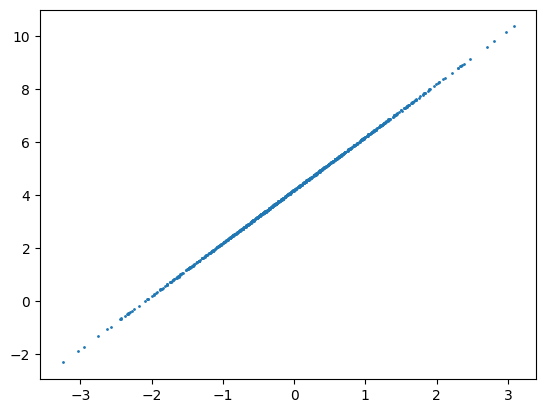

In [4]:
plt.scatter(features[:, (0)].detach().numpy(),
labels.detach().numpy(), 1)

In [5]:
# initializing the model
Theta_1 = torch.normal(0, 0.01, size=(1, 1), requires_grad=True)


Theta_0 = torch.zeros(1, requires_grad=True)
type(Theta_1)

torch.Tensor

In [11]:
# forward
def linreg(X, theta_1, theta_0):
  """The linear regression model."""

  return torch.matmul(X, theta_1) + theta_0

X = torch.ones([31,1]).float()
print(linreg(X,Theta_1,Theta_0))

tensor([[-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137],
        [-0.0137]], grad_fn=<AddBackward0>)


In [12]:
# Computing the MSE
def MSE_loss(y_out, y_true):
  """Squared loss."""
  return (y_out - y_true.reshape(y_out.shape))**2 / 2

In [7]:
# defining the learning algorithm
def sgd(params, lr, batch_size):
  """Minibatch stochastic gradient descent."""
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()


In [8]:
# data preperation
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  # The examples are read at random, in no particular order
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(indices[i:min(i +
    batch_size, num_examples)])
  yield features[batch_indices], labels[batch_indices]
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  print(type(X),type(y))
  break

tensor([[ 0.2741],
        [-0.6084],
        [ 0.2962],
        [ 0.7533],
        [ 1.5161],
        [ 0.3513],
        [ 0.5941],
        [-1.2917],
        [ 1.1441],
        [-0.3373]]) 
 tensor([[4.7543],
        [2.9633],
        [4.8066],
        [5.7112],
        [7.2007],
        [4.9159],
        [5.3908],
        [1.6234],
        [6.4820],
        [3.5199]])
<class 'torch.Tensor'> <class 'torch.Tensor'>


In [9]:
# hyper_paramters
lr = 0.05
num_epochs = 100
net = linreg
loss = MSE_loss


NameError: name 'linreg' is not defined

In [11]:
for epoch in range(num_epochs):

  for X, y in data_iter(batch_size, features, labels):

    l = loss(net(X, Theta_1, Theta_0), y) # Minibatch loss in `X` and `y`
    # Compute gradient on `l` with respect to [`theta1`, `theta0`]
    l.sum().backward()
    sgd([Theta_1, Theta_0], lr, batch_size) # Update parameters using their gradient
    with torch.no_grad():
      train_l = loss(net(features, Theta_1, Theta_0), labels)
      print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

print(Theta_0,Theta_1)

epoch 1, loss 9.841553
epoch 2, loss 9.007221
epoch 3, loss 8.244240
epoch 4, loss 7.498123
epoch 5, loss 6.744645
epoch 6, loss 6.082262
epoch 7, loss 5.255420
epoch 8, loss 4.604714
epoch 9, loss 4.040536
epoch 10, loss 3.734002
epoch 11, loss 3.432681
epoch 12, loss 3.138731
epoch 13, loss 2.785035
epoch 14, loss 2.555816
epoch 15, loss 2.314712
epoch 16, loss 2.114892
epoch 17, loss 1.896651
epoch 18, loss 1.741475
epoch 19, loss 1.534095
epoch 20, loss 1.359355
epoch 21, loss 1.172327
epoch 22, loss 1.069283
epoch 23, loss 0.977522
epoch 24, loss 0.872855
epoch 25, loss 0.773360
epoch 26, loss 0.713038
epoch 27, loss 0.613635
epoch 28, loss 0.556468
epoch 29, loss 0.491319
epoch 30, loss 0.452651
epoch 31, loss 0.431448
epoch 32, loss 0.383296
epoch 33, loss 0.330668
epoch 34, loss 0.306662
epoch 35, loss 0.273173
epoch 36, loss 0.245182
epoch 37, loss 0.229824
epoch 38, loss 0.197955
epoch 39, loss 0.179104
epoch 40, loss 0.159061
epoch 41, loss 0.136780
epoch 42, loss 0.125126
e

NameError: name 'net' is not defined

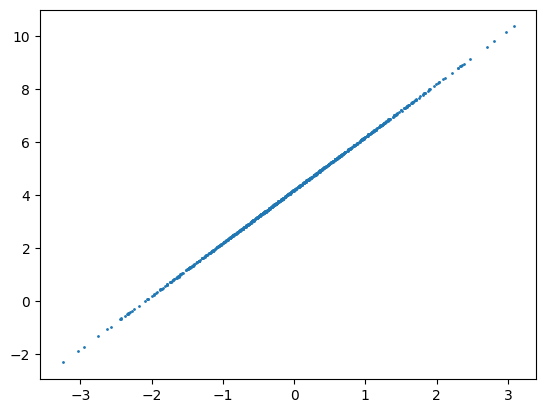

In [10]:
plt.scatter(features[:, (0)].detach().numpy(),
labels.detach().numpy(), 1)
plt.scatter(features[:, (0)].detach().numpy(),
net(features, Theta_1, Theta_0).detach().numpy(), 1)
